In [15]:
import os
import pandas as pd

# Folder containing the files
folder_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends"

# Load primary datasets
stats1_path = os.path.join(folder_path, "stats1.csv")
stats2_path = os.path.join(folder_path, "stats2.csv")

# Load match data
stats1 = pd.read_csv(stats1_path, low_memory=False)
stats2 = pd.read_csv(stats2_path, low_memory=False)

# Combine stats1 and stats2
combined_stats = pd.concat([stats1, stats2], ignore_index=True)

# Load auxiliary datasets
champs_path = os.path.join(folder_path, "champs.csv")
champs = pd.read_csv(champs_path)

# Example: Merge champion data into combined_stats
if 'championId' in combined_stats.columns and 'championId' in champs.columns:
    combined_stats = combined_stats.merge(champs, on='championId', how='left')

# Check the combined data
print(combined_stats.head())

# Save the combined stats for later use
combined_stats_path = os.path.join(folder_path, "combined_stats.csv")
combined_stats.to_csv(combined_stats_path, index=False)
print(f"Combined stats saved to {combined_stats_path}")


   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   

   neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
0                    69              42                27             610   
1                     1               1                 0             211   
2                     3               1                 2             182   
3                     6               6                 0             106   
4                     4               3                 1             159   

   champlvl  pinksbought  wardsbought  wardsplaced  wardskilled  firstbloo

In [17]:
import os
import pandas as pd

# Define folder path
folder_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends"

# Load main datasets
stats1_path = os.path.join(folder_path, "stats1.csv")
stats2_path = os.path.join(folder_path, "stats2.csv")

# Load CSV files
stats1 = pd.read_csv(stats1_path, low_memory=False)
stats2 = pd.read_csv(stats2_path, low_memory=False)

# Combine stats1 and stats2
data = pd.concat([stats1, stats2], ignore_index=True)

# Check the combined data
print(f"Data Shape: {data.shape}")
print(data.head())


Data Shape: (1834517, 56)
   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   

   neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
0                    69              42                27             610   
1                     1               1                 0             211   
2                     3               1                 2             182   
3                     6               6                 0             106   
4                     4               3                 1             159   

   champlvl  pinksbought  wardsbought  wardsplac

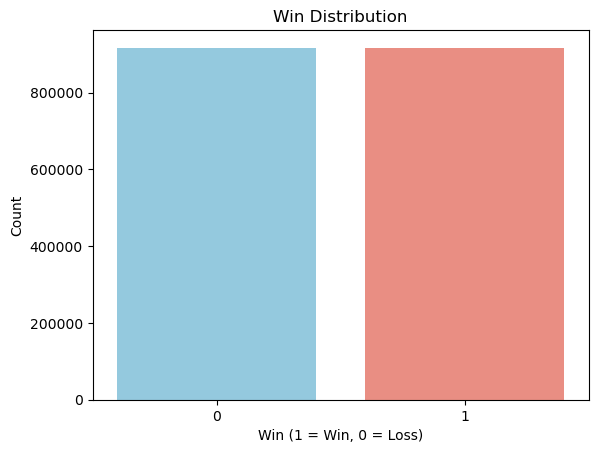

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'win' is treated as a categorical variable
data['win'] = data['win'].astype('category')

# Set a color palette for the bars
custom_palette = ["skyblue", "salmon"]  # Colors for '0' (Loss) and '1' (Win)

# Win Distribution with hue
sns.countplot(data=data, x='win', hue='win', palette=custom_palette, dodge=False)
plt.title("Win Distribution")
plt.xlabel("Win (1 = Win, 0 = Loss)")
plt.ylabel("Count")
plt.legend([],[], frameon=False)  # Removes the legend since it's redundant
plt.show()


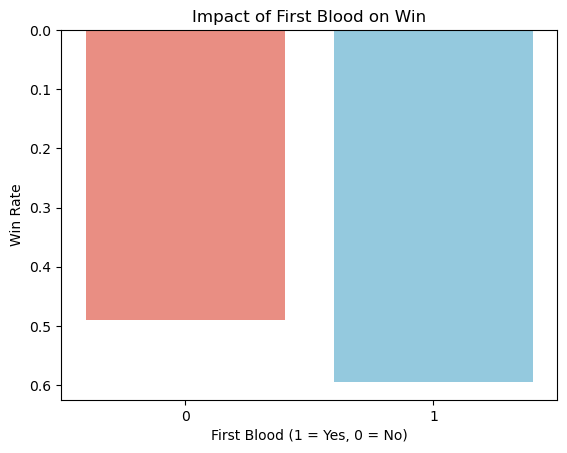

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette for the bars
custom_palette = ["salmon", "skyblue"]  # Colors for '0' (No First Blood) and '1' (First Blood)

# Ensure 'firstblood' is treated as categorical
data['firstblood'] = data['firstblood'].astype('category')

# First Blood Impact on Win
sns.barplot(data=data, x='firstblood', y='win', hue='firstblood', palette=custom_palette, dodge=False, errorbar=None)
plt.title("Impact of First Blood on Win")
plt.xlabel("First Blood (1 = Yes, 0 = No)")
plt.ylabel("Win Rate")
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()


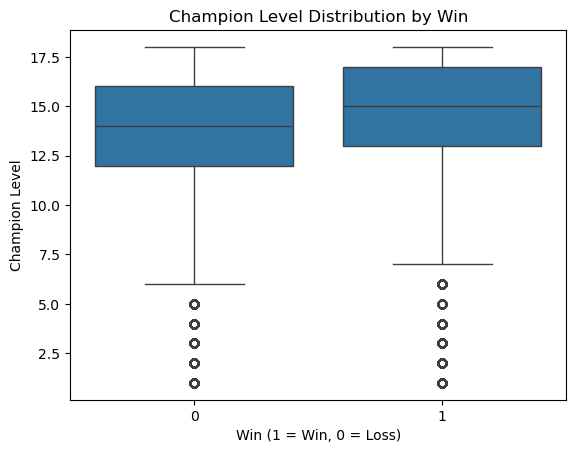

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Champion Level Distribution by Win
sns.boxplot(x='win', y='champlvl', data=data)
plt.title("Champion Level Distribution by Win")
plt.xlabel("Win (1 = Win, 0 = Loss)")
plt.ylabel("Champion Level")
plt.show()


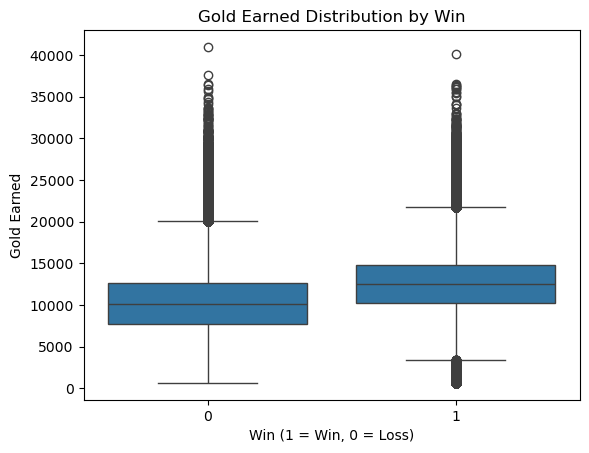

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gold Earned Distribution by Win
sns.boxplot(x='win', y='goldearned', data=data)
plt.title("Gold Earned Distribution by Win")
plt.xlabel("Win (1 = Win, 0 = Loss)")
plt.ylabel("Gold Earned")
plt.show()


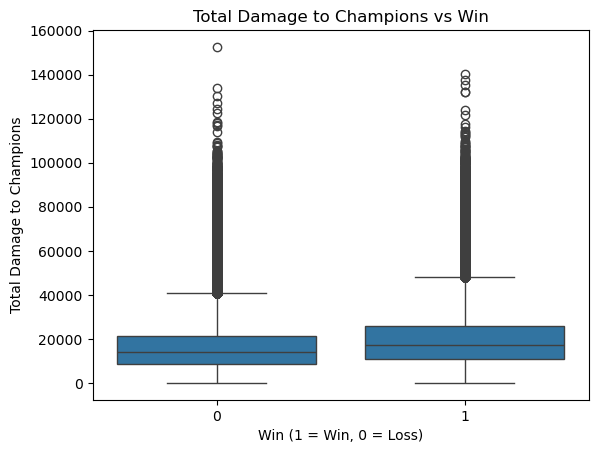

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total Damage to Champions by Win
sns.boxplot(x='win', y='totdmgtochamp', data=data)
plt.title("Total Damage to Champions vs Win")
plt.xlabel("Win (1 = Win, 0 = Loss)")
plt.ylabel("Total Damage to Champions")
plt.show()


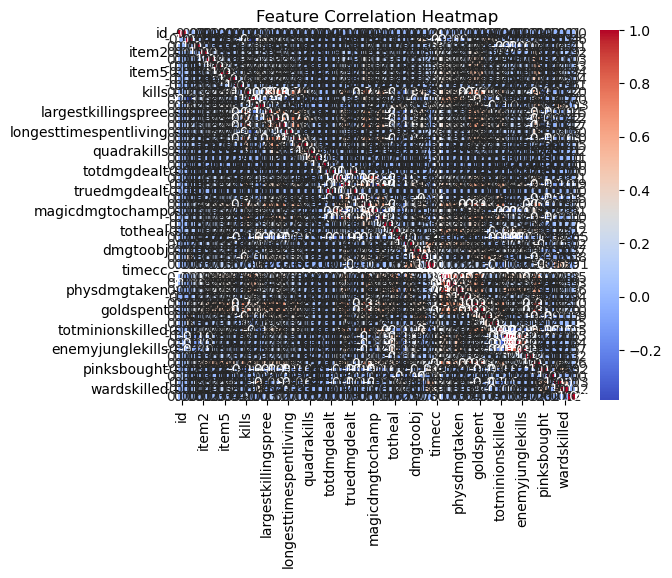

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlation = data.corr()

# Plot: Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


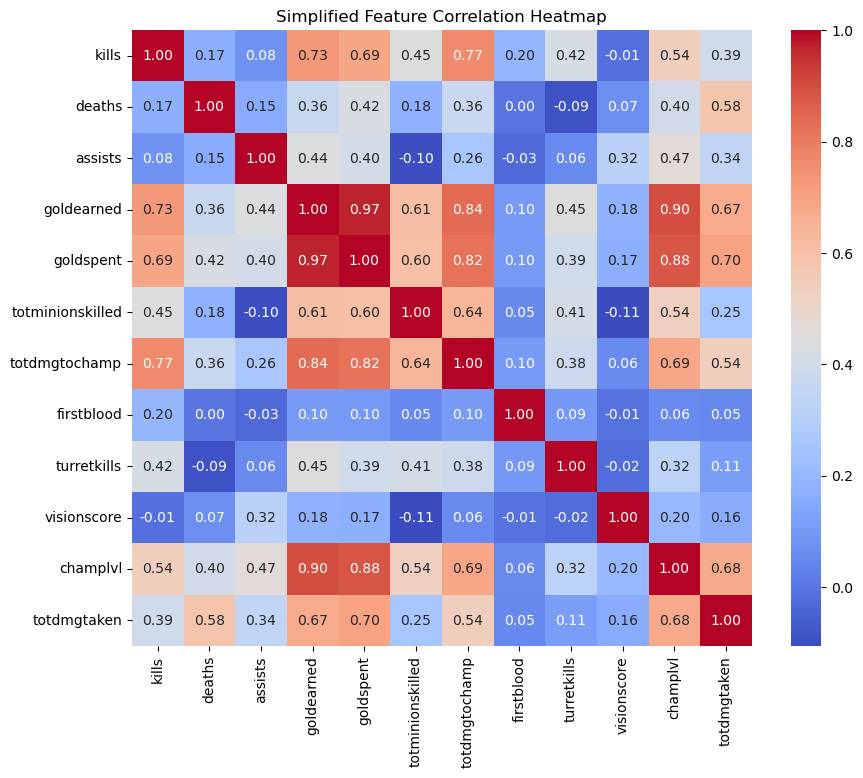

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to keep
columns_to_keep = [
    'kills', 'deaths', 'assists', 'goldearned', 'goldspent', 'totminionskilled',
    'totdmgtochamp', 'firstblood', 'turretkills', 'visionscore', 'champlvl', 'totdmgtaken'
]

# Filter the dataset to include only the relevant columns
filtered_data = data[columns_to_keep]

# Calculate correlations
correlation = filtered_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for readability
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Simplified Feature Correlation Heatmap")
plt.show()


In [45]:
print(data.columns)


Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')


In [51]:
print("Stats1 Columns:", stats1.columns)
print("Stats2 Columns:", stats2.columns)


Stats1 Columns: Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')
Stats2 Columns: Index(['id', 'win', 'item1

In [53]:
# Load participants.csv and matches.csv
participants_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/participants.csv"
matches_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/matches.csv"

participants = pd.read_csv(participants_path, low_memory=False)
matches = pd.read_csv(matches_path, low_memory=False)

# Print column names
print("Participants Columns:", participants.columns)
print("Matches Columns:", matches.columns)


Participants Columns: Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position'],
      dtype='object')
Matches Columns: Index(['id', 'gameid', 'platformid', 'queueid', 'seasonid', 'duration',
       'creation', 'version'],
      dtype='object')


In [57]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Load participants.csv
participants_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/participants.csv"
participants = pd.read_csv(participants_path, low_memory=False)

# Load champs.csv for champion names
champs_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/champs.csv"
champs = pd.read_csv(champs_path)

# Create a dictionary to map champion IDs to names
champion_dict = dict(zip(champs['id'], champs['name']))  # Adjust columns if necessary

# Group champions by matchid
match_champions = participants.groupby('matchid')['championid'].apply(list)

# Generate all pairs of champions for each match
champion_pairs = []
for champions in match_champions:
    champion_pairs.extend(combinations(champions, 2))

# Count occurrences of each champion pair
pair_counts = Counter(champion_pairs)

# Convert to a DataFrame
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Champion Pair', 'Count'])

# Replace champion IDs with names
pair_counts_df['Champion Pair'] = pair_counts_df['Champion Pair'].apply(
    lambda pair: (champion_dict.get(pair[0], pair[0]), champion_dict.get(pair[1], pair[1]))
)

# Sort by count in descending order
pair_counts_df = pair_counts_df.sort_values(by='Count', ascending=False)

# Display top 10 champion pairs with names
print(pair_counts_df.head(10))

# Save the results to a CSV file for further analysis
output_path = "C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/champion_pairs.csv"
pair_counts_df.to_csv(output_path, index=False)
print(f"Champion pairs saved to {output_path}")



           Champion Pair  Count
2387   (Lucian, Lee Sin)   9590
2845  (Caitlyn, Lee Sin)   9494
379   (Lee Sin, Caitlyn)   9493
1996   (Lee Sin, Lucian)   9372
2002   (Lee Sin, Thresh)   8141
245    (Thresh, Lee Sin)   8096
975     (Lucian, Thresh)   7972
313     (Thresh, Lucian)   7841
318    (Thresh, Caitlyn)   7769
1187   (Caitlyn, Thresh)   7655
Champion pairs saved to C:/Users/elgol/Documents/school work/Machinelearning/archiveLeagueofLegends-20241128T223101Z-001/archiveLeagueofLegends/champion_pairs.csv


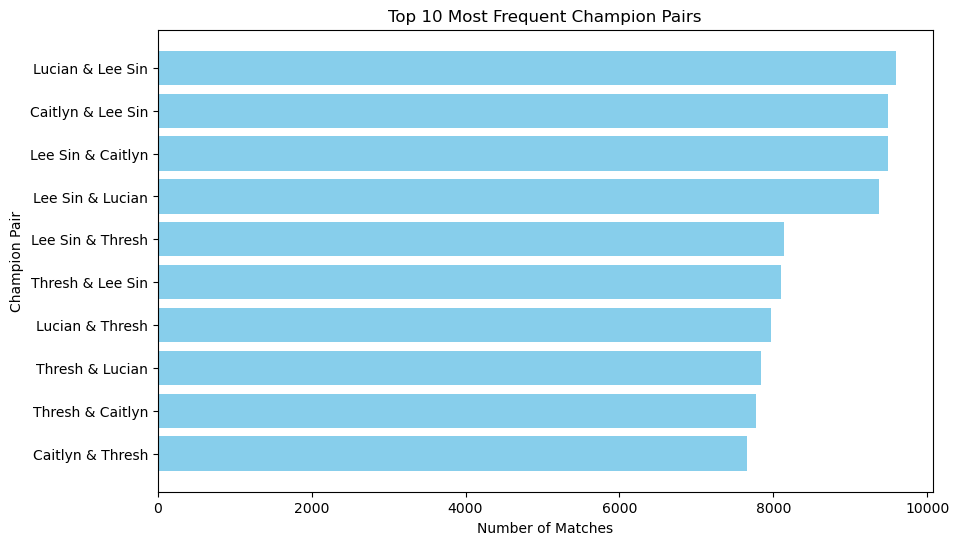

In [59]:
import matplotlib.pyplot as plt

# Select the top 10 pairs
top_pairs = pair_counts_df.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(
    [f"{pair[0]} & {pair[1]}" for pair in top_pairs['Champion Pair']],
    top_pairs['Count'],
    color='skyblue'
)
plt.xlabel('Number of Matches')
plt.ylabel('Champion Pair')
plt.title('Top 10 Most Frequent Champion Pairs')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


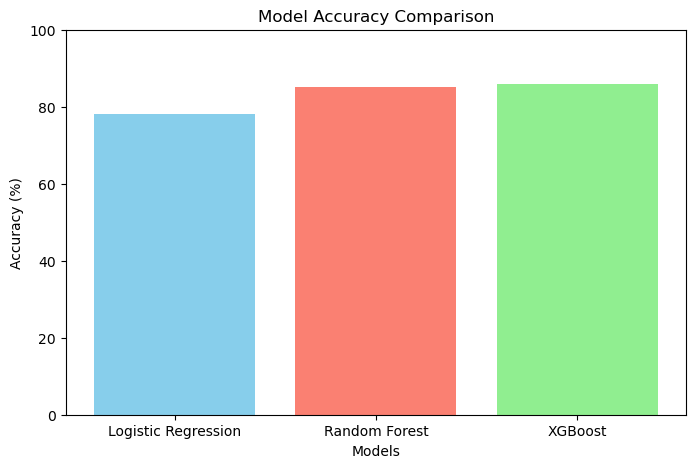

In [79]:
import matplotlib.pyplot as plt

# Accuracy values (replace with your actual values)
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [78, 85, 86]  # Replace these with your calculated accuracies

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Set y-axis range to 0-100
plt.show()


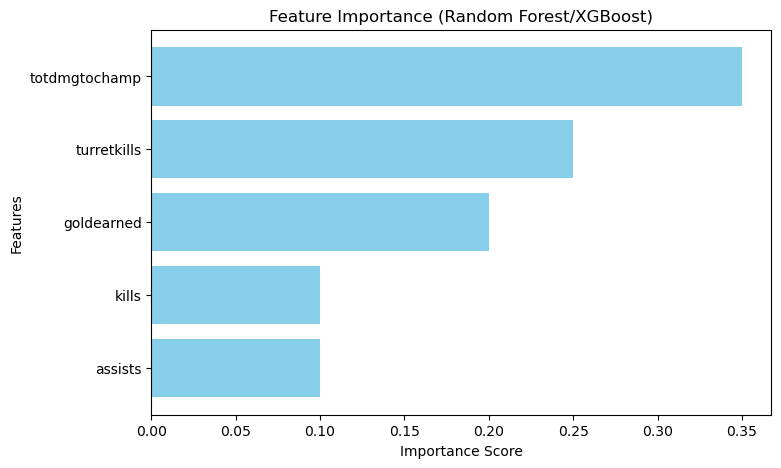

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Example feature importance (replace with actual values from your model)
feature_importances = {
    'totdmgtochamp': 0.35,
    'turretkills': 0.25,
    'goldearned': 0.20,
    'kills': 0.10,
    'assists': 0.10
}

# Convert to DataFrame for easier plotting
feature_importance_df = pd.DataFrame(
    list(feature_importances.items()),
    columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance (Random Forest/XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


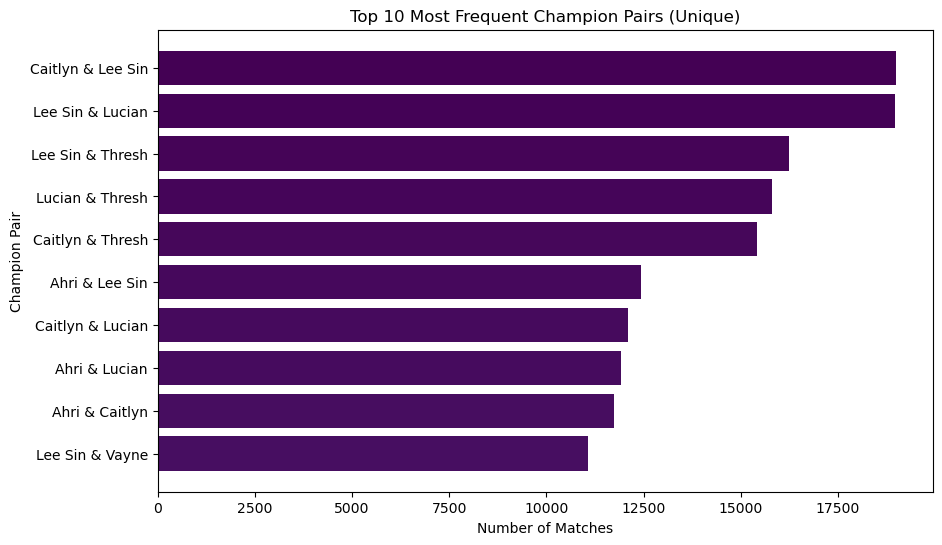

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine champion pairs to remove duplicates (e.g., treat (A, B) and (B, A) as the same)
pair_counts_df['Champion Pair'] = pair_counts_df['Champion Pair'].apply(lambda pair: tuple(sorted(pair)))
unique_pairs = pair_counts_df.groupby('Champion Pair')['Count'].sum().reset_index()
unique_pairs = unique_pairs.sort_values(by='Count', ascending=False).head(10)

# Plot the data with color-coding
colors = plt.cm.viridis(range(len(unique_pairs)))  # Generate distinct colors for each bar

plt.figure(figsize=(10, 6))
plt.barh(
    [f"{pair[0]} & {pair[1]}" for pair in unique_pairs['Champion Pair']],
    unique_pairs['Count'],
    color=colors
)
plt.xlabel('Number of Matches')
plt.ylabel('Champion Pair')
plt.title('Top 10 Most Frequent Champion Pairs (Unique)')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()
